# Projeto: Predição de Vitória no League of Legends (10 min)

Neste projeto, usamos um dataset do Kaggle com estatísticas dos primeiros 10 minutos de partidas ranqueadas no LoL para prever a vitória do time azul.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

### Carregar e visualizar o dataset

In [3]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


### Selecionar variáveis preditoras e alvo

In [4]:
X = df.drop(columns=["gameId", "blueWins"])
y = df["blueWins"]

### Dividir dados em treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Padronizar os dados

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinar modelo de Árvore de Decisão

In [7]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Avaliar modelo

In [8]:
y_pred = model.predict(X_test_scaled)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório:\n", classification_report(y_test, y_pred))

Acurácia: 0.7246963562753036
Matriz de confusão:
 [[710 273]
 [271 722]]
Relatório:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.73      0.73      0.73       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



### Importância das variáveis

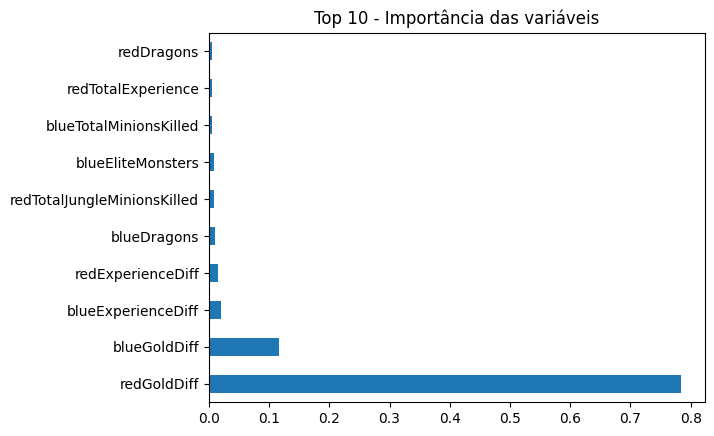

In [9]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)
importances.plot(kind="barh", title="Top 10 - Importância das variáveis")
plt.show()

### Visualização da árvore de decisão

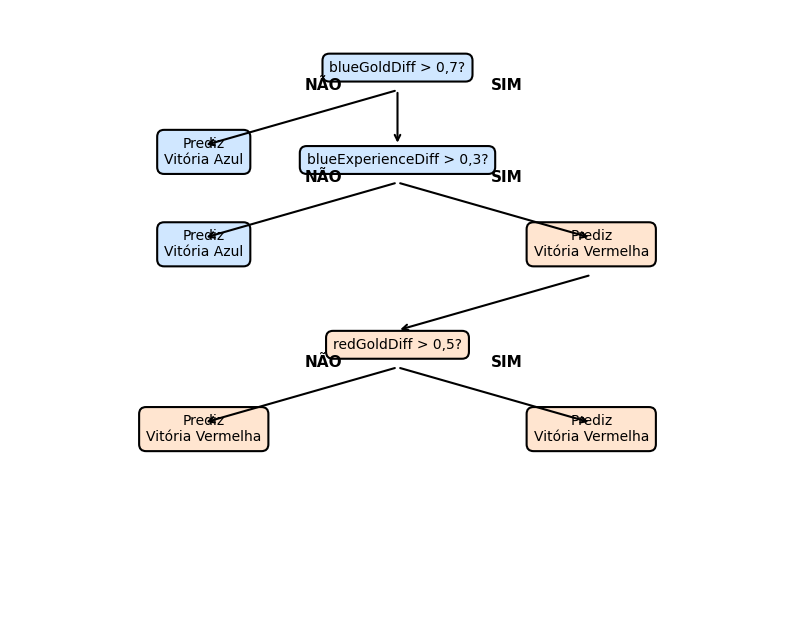

In [10]:

fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

def add_box(text, xy, color, ax, boxstyle="round,pad=0.5"):
    return ax.annotate(text, xy=xy, xycoords='data',
                       bbox=dict(boxstyle=boxstyle, fc=color, ec="black", lw=1.5),
                       ha='center', fontsize=10)

# Caixas do fluxograma
step1 = add_box("blueGoldDiff > 0,7?", (0.5, 0.9), "#d0e7ff", ax)
left1 = add_box("Prediz\nVitória Azul", (0.25, 0.75), "#d0e7ff", ax)
step2 = add_box("blueExperienceDiff > 0,3?", (0.5, 0.75), "#d0e7ff", ax)
left2 = add_box("Prediz\nVitória Azul", (0.25, 0.6), "#d0e7ff", ax)
right2 = add_box("Prediz\nVitória Vermelha", (0.75, 0.6), "#ffe5d0", ax)
step3 = add_box("redGoldDiff > 0,5?", (0.5, 0.45), "#ffe5d0", ax)
right3 = add_box("Prediz\nVitória Vermelha", (0.75, 0.3), "#ffe5d0", ax)
left3 = add_box("Prediz\nVitória Vermelha", (0.25, 0.3), "#ffe5d0", ax)

# Setas do fluxograma
arrowprops = dict(arrowstyle="->", color="black", lw=1.5)
ax.annotate("", xy=(0.25, 0.78), xytext=(0.5, 0.87), arrowprops=arrowprops)
ax.annotate("", xy=(0.5, 0.78), xytext=(0.5, 0.87), arrowprops=arrowprops)
ax.annotate("", xy=(0.25, 0.63), xytext=(0.5, 0.72), arrowprops=arrowprops)
ax.annotate("", xy=(0.75, 0.63), xytext=(0.5, 0.72), arrowprops=arrowprops)
ax.annotate("", xy=(0.5, 0.48), xytext=(0.75, 0.57), arrowprops=arrowprops)
ax.annotate("", xy=(0.75, 0.33), xytext=(0.5, 0.42), arrowprops=arrowprops)
ax.annotate("", xy=(0.25, 0.33), xytext=(0.5, 0.42), arrowprops=arrowprops)

# Rótulos de decisão
ax.text(0.38, 0.87, "NÃO", fontsize=11, weight='bold')
ax.text(0.62, 0.87, "SIM", fontsize=11, weight='bold')
ax.text(0.38, 0.72, "NÃO", fontsize=11, weight='bold')
ax.text(0.62, 0.72, "SIM", fontsize=11, weight='bold')
ax.text(0.38, 0.42, "NÃO", fontsize=11, weight='bold')
ax.text(0.62, 0.42, "SIM", fontsize=11, weight='bold')

plt.show()


### 🔍 Análise Exploratória dos Dados (EDA)

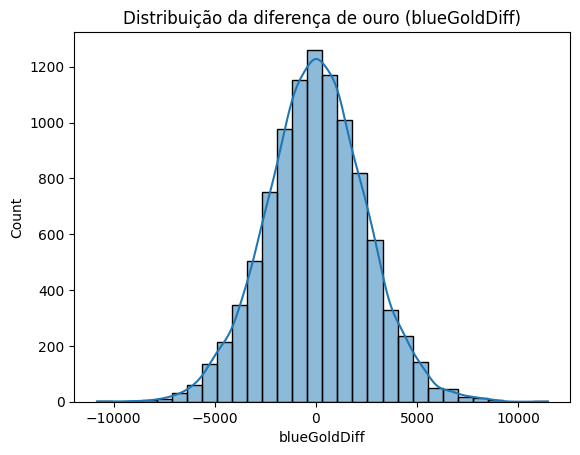

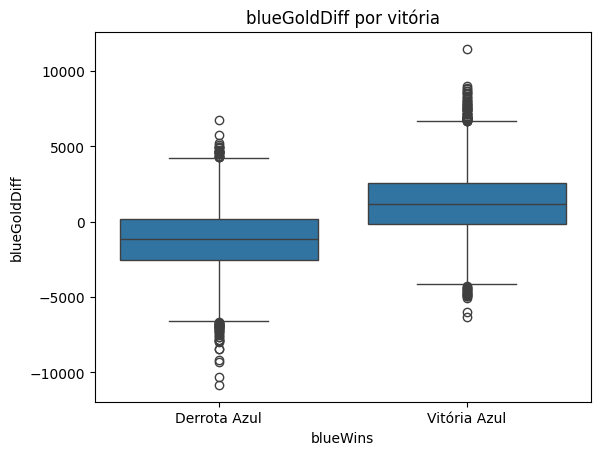

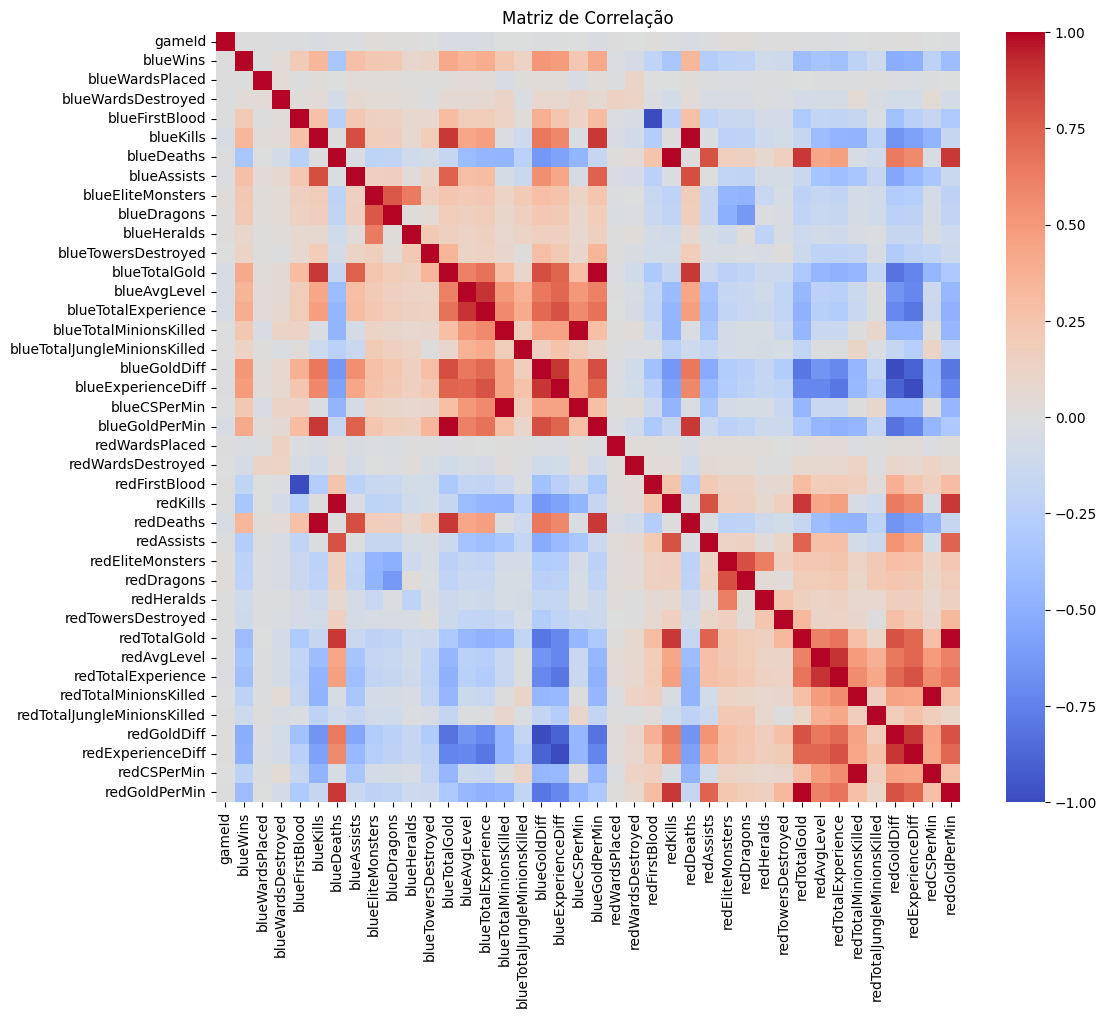

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Histograma da diferença de ouro
sns.histplot(df['blueGoldDiff'], kde=True, bins=30)
plt.title("Distribuição da diferença de ouro (blueGoldDiff)")
plt.show()

# Boxplot comparando ouro por vitória
sns.boxplot(data=df, x='blueWins', y='blueGoldDiff')
plt.title("blueGoldDiff por vitória")
plt.xticks([0, 1], ['Derrota Azul', 'Vitória Azul'])
plt.show()

# Heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação")
plt.show()


### 🧠 Criação de Novas Features

In [12]:

df['blueGoldPerKill'] = df['blueTotalGold'] / (df['blueKills'] + 1)
df['blueAssistRate'] = df['blueAssists'] / (df['blueKills'] + df['blueDeaths'] + 1)
df['blueEfficiency'] = df['blueTotalGold'] / (df['blueTotalMinionsKilled'] + df['blueTotalJungleMinionsKilled'] + 1)


### 🌳 Modelo Random Forest com Novas Features

Acurácia Random Forest: 0.7064777327935222
Matriz de Confusão:
 [[712 271]
 [309 684]]
Relatório:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       983
           1       0.72      0.69      0.70       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



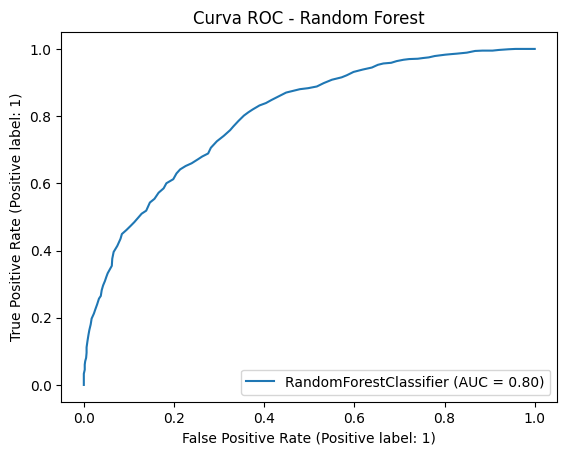

In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# Atualizando X e y
X = df.drop(columns=["gameId", "blueWins"])
y = df["blueWins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório:\n", classification_report(y_test, y_pred_rf))

# Curva ROC
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()


### 📊 Importância das Variáveis (Random Forest)

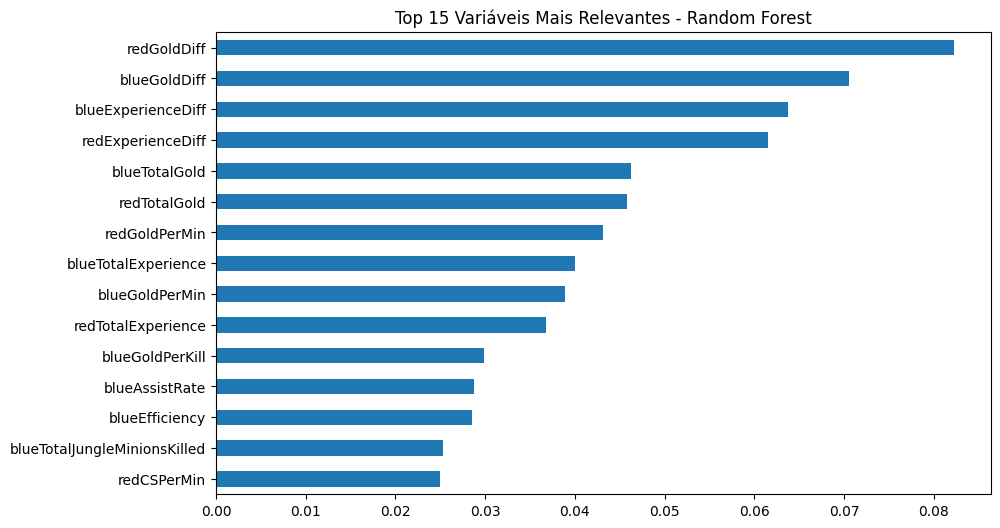

In [14]:

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True).tail(15)
importances.plot(kind='barh', figsize=(10, 6), title='Top 15 Variáveis Mais Relevantes - Random Forest')
plt.show()
